# Day 13. Task 06
# Кластеризация

## 0. Импорты

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Препроцессинг

1. Загрузите файл из: `datasets/regression.csv`.
2. Удалите столбец `pageviews`. Вы будете кластеризировать пользователей только по двум признакам: количеству коммитов и их средней разнице.

In [7]:
df = pd.read_csv('../content/drive/MyDrive/School21/day13/data/regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667
5,user_19,118,16.0,-98.750000
6,user_21,65,10.0,-95.500000
7,user_25,79,179.0,-92.600000
8,user_28,60,149.0,-86.400000
9,user_3,18,317.0,-105.400000


In [8]:
df.drop(columns=['pageviews', 'uid'], inplace=True)
df

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


In [9]:
X = df[['num_commits', 'AVG(diff)']].values
X

array([[  62.        ,  -64.4       ],
       [  20.        ,  -74.8       ],
       [  61.        , -159.        ],
       [  51.        ,  -61.6       ],
       [   5.        ,   -5.66666667],
       [ 118.        ,  -98.75      ],
       [  65.        ,  -95.5       ],
       [  79.        ,  -92.6       ],
       [  60.        ,  -86.4       ],
       [  18.        , -105.4       ],
       [  34.        , -145.25      ],
       [   7.        ,   -2.        ],
       [  86.        ,  -89.        ],
       [  52.        ,  -48.5       ],
       [  23.        ,  -17.5       ],
       [  41.        ,  -39.33333333],
       [  46.        , -137.2       ],
       [  57.        ,  -27.        ],
       [   5.        , -141.4       ],
       [   6.        ,  -84.        ],
       [  37.        , -223.6       ],
       [  36.        ,  -52.33333333],
       [  27.        ,   -5.33333333],
       [  51.        , -157.4       ],
       [ 128.        , -104.75      ],
       [  40.        , -1

## 2. KMeans

1. Изучите документацию о том, как работает этот алгоритм.
2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `random_state=21` и `n_clusters=3`.
3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.
4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
5. Посчитайте `silhouette_score` для них (изучите документацию по этой метрике).

In [12]:
CMP_NUM_THREADS = 1

In [14]:
kmeans = KMeans(n_clusters=3, random_state=21).fit(df)

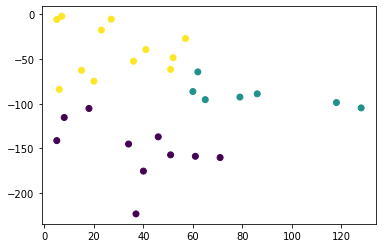

In [15]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)

In [16]:
silhouette_score(df, kmeans.labels_)

0.43901709571532954

0.41787451607810133

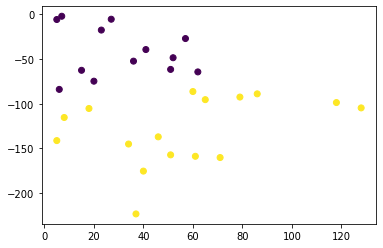

In [17]:
kmeans = KMeans(n_clusters=2, random_state=21).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)
silhouette_score(df, kmeans.labels_)

0.4396571916717123

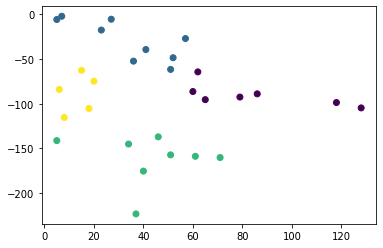

In [18]:
kmeans = KMeans(n_clusters=4, random_state=21).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)
silhouette_score(df, kmeans.labels_)

0.44641001650786977

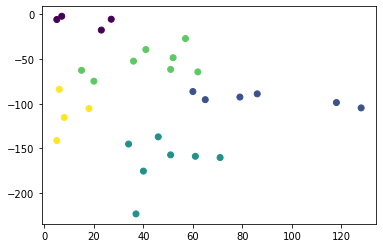

In [19]:
kmeans = KMeans(n_clusters=5, random_state=21).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)
silhouette_score(df, kmeans.labels_)

## 3. DBSCAN

1. Изучите документацию о том, как работает этот алгоритм.
2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `eps=20` и `min_samples=2`.
3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.
4. Попробуйте разные значения `eps` и `min_samples` и посмотрите, как изменится ваш график.
5. Посчитайте `silhouette_score` для них.

In [20]:
clustering = DBSCAN(eps=20, min_samples=2).fit(df)
clustering.labels_

array([ 0,  1,  2,  0,  3,  4,  5,  5,  5,  6,  7,  3,  5,  0,  8,  0,  7,
       -1, -1,  1, -1,  0,  8,  2,  4, -1,  1,  6,  2])

In [21]:
len(np.unique(clustering.labels_))

10

0.38339641455696616

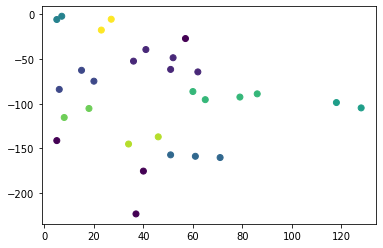

In [22]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)
silhouette_score(df, clustering.labels_)

0.046677004430482796

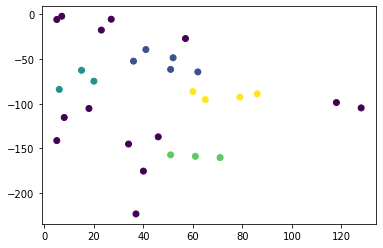

In [23]:
clustering = DBSCAN(eps=20, min_samples=3).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)
silhouette_score(df, clustering.labels_)

0.3659855186711519

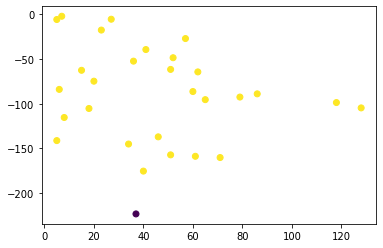

In [24]:
clustering = DBSCAN(eps=40, min_samples=3).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)
silhouette_score(df, clustering.labels_)

0.19881722125199422

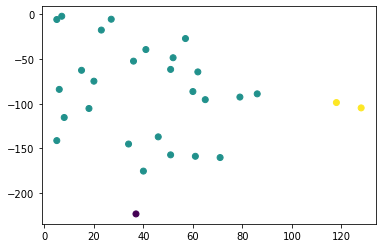

In [28]:
clustering = DBSCAN(eps=30, min_samples=2).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)
silhouette_score(df, clustering.labels_)

-0.07923479818777455

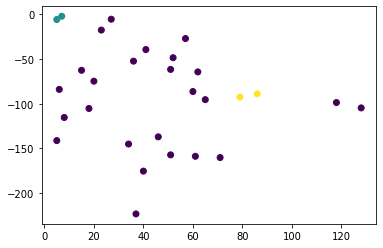

In [29]:
clustering = DBSCAN(eps=10, min_samples=2).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)
silhouette_score(df, clustering.labels_)

## 4. Иерархическая кластеризация (AgglomerativeClustering)

1. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `n_clusters=5`.
2. Визуализируйте полученные данные и кластеры, используя `scatter plot`.
3. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
4. Посчитайте `silhouette_score` для них.
5. Визуализируйте дендрограмму (`dendrogram`).

In [30]:
hierarchical = AgglomerativeClustering(n_clusters=5).fit(df)

In [31]:
hierarchical.labels_

array([2, 3, 0, 2, 4, 1, 1, 1, 1, 3, 0, 4, 1, 2, 4, 2, 0, 2, 3, 3, 0, 2,
       4, 0, 1, 0, 3, 3, 0])

0.46383015199381467

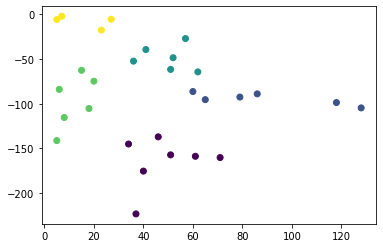

In [33]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)
silhouette_score(df, hierarchical.labels_)

In [34]:
hierarchical = AgglomerativeClustering(n_clusters=3).fit(df)

0.3390493703444805

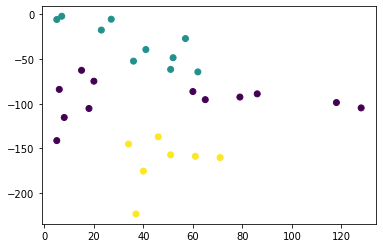

In [35]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)
silhouette_score(df, hierarchical.labels_)

In [36]:
hierarchical = AgglomerativeClustering(n_clusters=2).fit(df)

0.35902490572221984

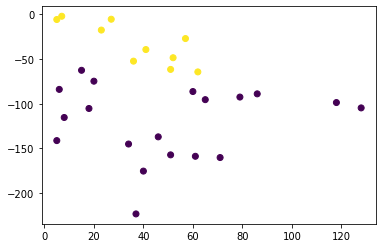

In [37]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)
silhouette_score(df, hierarchical.labels_)

0.4448362750283643

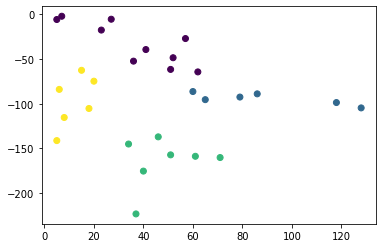

In [38]:
hierarchical = AgglomerativeClustering(n_clusters=4).fit(df)
plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)
silhouette_score(df, hierarchical.labels_)

In [39]:
Z = linkage(df, method='ward')

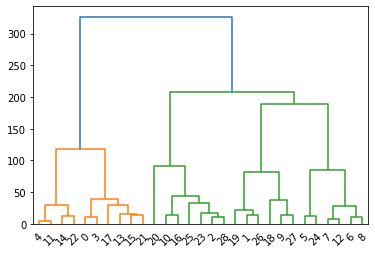

In [40]:
dendrogram(Z);

## 5. Функция

Напишите функцию, которая:
1. Принимает в качестве аргументов: класс модели кластеризации, его параметры, название параметра для оптимизации, интервал значений для перебора вариантов и датасет.
2. Пробует различные значения из этого интервала для заданного параметра и рассчитывает `silhouette_score` для каждого нового значения.
3. Определяет лучшее значение параметра из интервала с точки зрения этой метрики.
4. Возвращает два графика:
    - первый показывает, как `silhouette_score` менялся в зависимости от изменения параметра,
    - второй показывает данные и кластера на `scatter plot` для наилучшего значения из интервала.

In [47]:
def optimize(model_class, params, param_to_optimize, param_range, df):
  silhouettes = []
  for val in param_range:
    params[param_to_optimize] = val
    regr = model_class(**params)
    regr.fit(df)
    labs = regr.labels_
    if len(set(labs)) < 2:
      new_val = 0
    else:
      new_val = silhouette_score(df, labs)
    silhouettes.append(new_val)
  best_idx = silhouettes.index(max(silhouettes)) 
  params[param_to_optimize] = param_range[best_idx]
  regr = model_class(**params)
  regr.fit(df)
  labs = regr.labels_
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(param_range, silhouettes, 'bo-')
  ax2.scatter(df.num_commits, df['AVG(diff)'], c=regr.labels_)
  fig.set_figheight(8)    
  fig.set_figwidth(17)
  ax1.title.set_text('silhouettes_score')
  ax2.title.set_text('Scatter piot for the best {} - {}'.format(param_to_optimize, param_range[best_idx])) 
  ax1.xaxis.grid()   

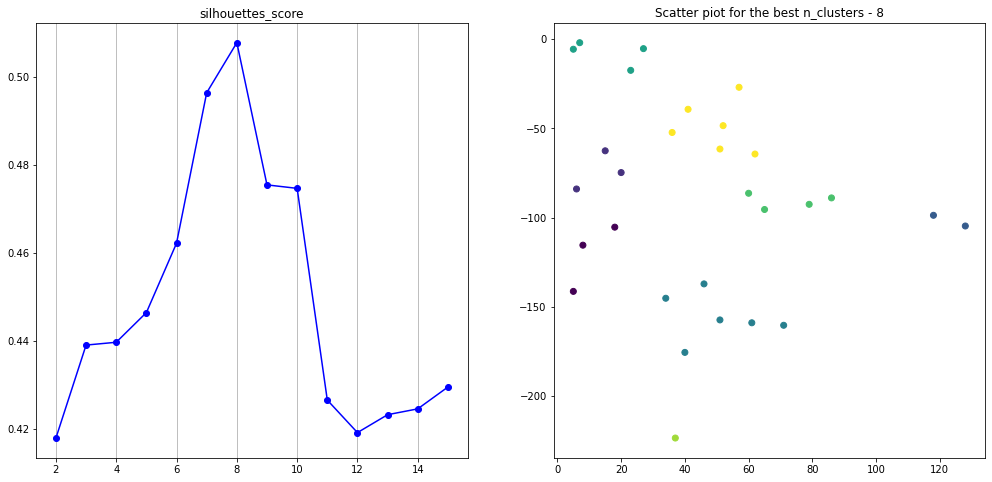

In [51]:
params = {'random_state': 21}
optimize(KMeans, params, 'n_clusters', list(range(2, 16)), df[['num_commits', 'AVG(diff)']])

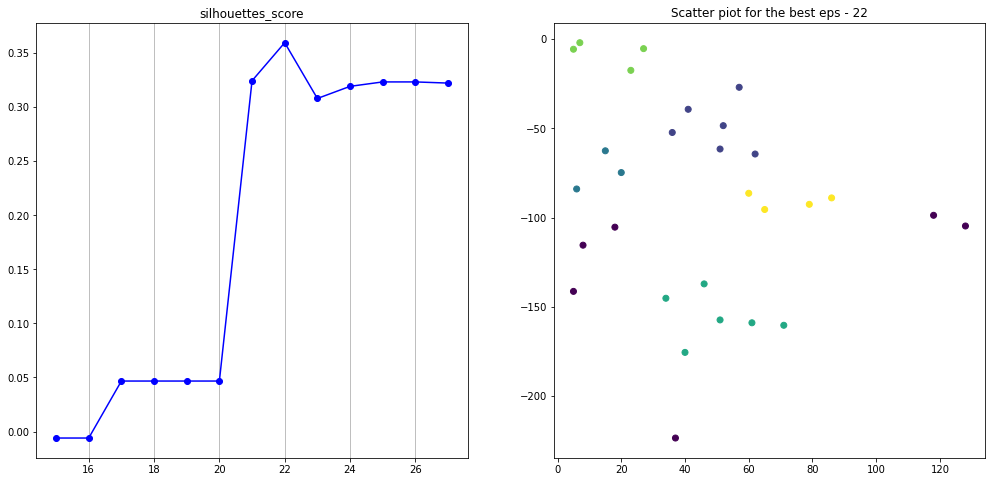

In [50]:
params = {'min_samples': 3}
optimize(DBSCAN, params, 'eps', list(range(15, 28)), df[['num_commits', 'AVG(diff)']])

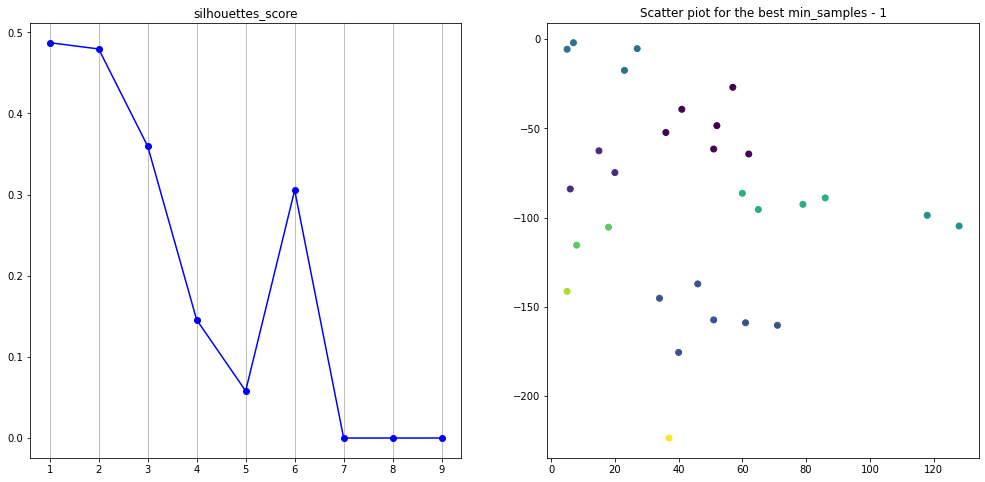

In [52]:
params = {'eps': 22}
optimize(DBSCAN, params, 'min_samples', list(range(1, 10)), df[['num_commits', 'AVG(diff)']])

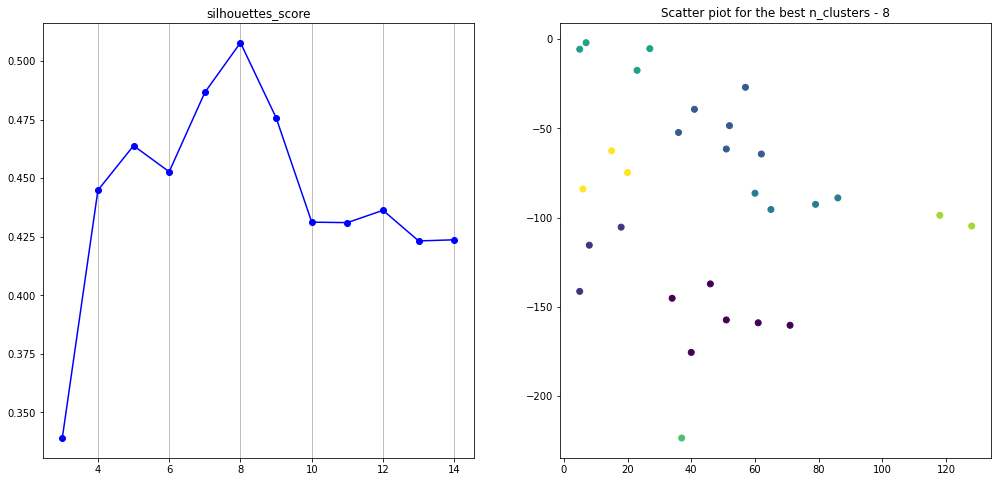

In [55]:
params = {}
optimize(AgglomerativeClustering, params, 'n_clusters', list(range(3, 15)), df[['num_commits', 'AVG(diff)']])